<div >
    <img src = "../banner/banner_ML_UNLP_1900_200.png" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/ML_UNLP_Lectures/blob/main/Week03/Notebook_SS03_arboles.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



# Classification

To work through the steps of probability-based classification, we’ll use a real dataset on loans and credit from a set of local lenders in Germany (taken from the UC Irvine Machine Learning Repository and cleaned for our purposes). 

Credit scoring is a classic problem of classification, and it remains one of the big application domains for ML: use previous loan results (default versus payment) to train a model that can predict the performance of potential new loans.

\begin{align}
Default=f(x) + u
\end{align}

where $Default=I(Default=1)$



# Dataset

Let's load the modules:

In [1]:
import numpy as np
import pandas as pd

In [2]:
db = pd.read_csv("https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/credit.csv")

In [3]:
db = db.iloc[:, 1:] #remove first column
db.head()

,Default,duration,amount,installment,age,history,purpose,foreign,rent
0,0,6,1169,4,67,terrible,goods/repair,foreign,False
1,1,48,5951,2,22,poor,goods/repair,foreign,False
2,0,12,2096,2,49,terrible,edu,foreign,False
3,0,42,7882,2,45,poor,goods/repair,foreign,False
4,1,24,4870,3,53,poor,newcar,foreign,False


In [4]:
db['foreign'].value_counts(normalize=True) * 100




foreign    96.3
german      3.7
Name: foreign, dtype: float64

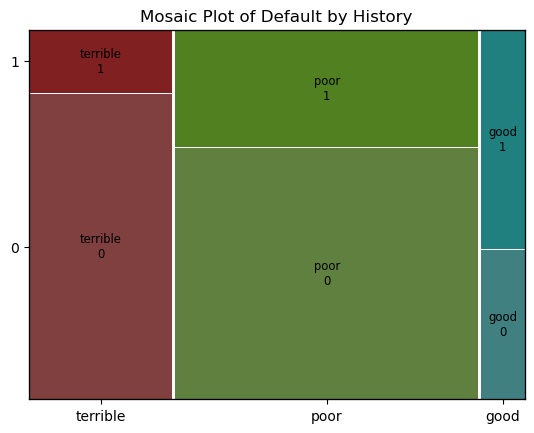

In [5]:

import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming df is your DataFrame equivalent to the 'credit' data frame in R
# and it contains 'Default' and 'history' columns

# Create a mosaic plot
mosaic(db, ['history', 'Default'], title='Mosaic Plot of Default by History')
plt.ylabel('Default')
plt.show()


## Estimación Logit

\begin{align}
p_i &=\frac{e^{X_i\beta}}{1+e^{X_i\beta}}
\end{align}


In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Convert 'history' and 'purpose' into dummy variables
db_dummies = pd.get_dummies(db, columns=['history', 'purpose','foreign'], drop_first=True)

# Separate the independent and dependent variables
X = db_dummies.drop('Default', axis=1)
y = db_dummies['Default']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )




In [8]:
# Fit the logistic regression model
logit_model = LogisticRegression(max_iter=200 )
logit_model.fit(X_train,y_train)


LogisticRegression(max_iter=200)

## Prediction


\begin{align}
\hat{p}_i &=\frac{e^{X_i\hat{\beta}}}{1+e^{X_i\hat{\beta}}}
\end{align}

In [9]:
y_test=pd.DataFrame(y_test)
y_test.head()

,Default
681,0
990,0
155,1
768,0
438,0


In [10]:

# Predict the probabilities
y_test['prob_hat'] = logit_model.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head()


,Default,prob_hat
681,0,0.214564
990,0,0.187190
155,1,0.265616
768,0,0.163977
438,0,0.177238


## Classification 

\begin{align}
\hat{Y}_i= 1[\hat{p}_i >0.5]
\end{align}

In [11]:

# Define the rule (threshold)
rule = 0.5

# Create the predicted class labels based on the rule
y_test['Default_hat_logit'] = (y_test['prob_hat'] > rule).astype(int)

# Display the first few rows of the specified columns
print(y_test[['Default', 'prob_hat', 'Default_hat_logit']].head(30))

     Default  prob_hat  Default_hat_logit
681        0  0.214564                  0
990        0  0.187190                  0
155        1  0.265616                  0
768        0  0.163977                  0
438        0  0.177238                  0
363        0  0.215117                  0
688        0  0.185587                  0
555        1  0.162870                  0
620        0  0.182760                  0
99         0  0.277222                  0
756        0  0.053970                  0
428        0  0.132411                  0
888        0  0.494974                  0
89         1  0.384289                  0
982        0  0.325476                  0
495        1  0.236719                  0
29         1  0.495372                  0
175        1  0.384444                  0
466        1  0.392149                  0
40         0  0.299198                  0
566        1  0.270396                  0
516        0  0.099572                  0
929        0  0.338415            

In [12]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(
            y_true    = y_test['Default'],
            y_pred    = y_test['Default_hat_logit'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")




El accuracy de test es: 68.5%


In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test['Default'],
    y_test['Default_hat_logit'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix



Predicción,0,1
Real,,
0,121,9
1,54,16


# CARTs

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Creación del modelo
# ------------------------------------------------------------------------------
model_tree = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model_tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 27


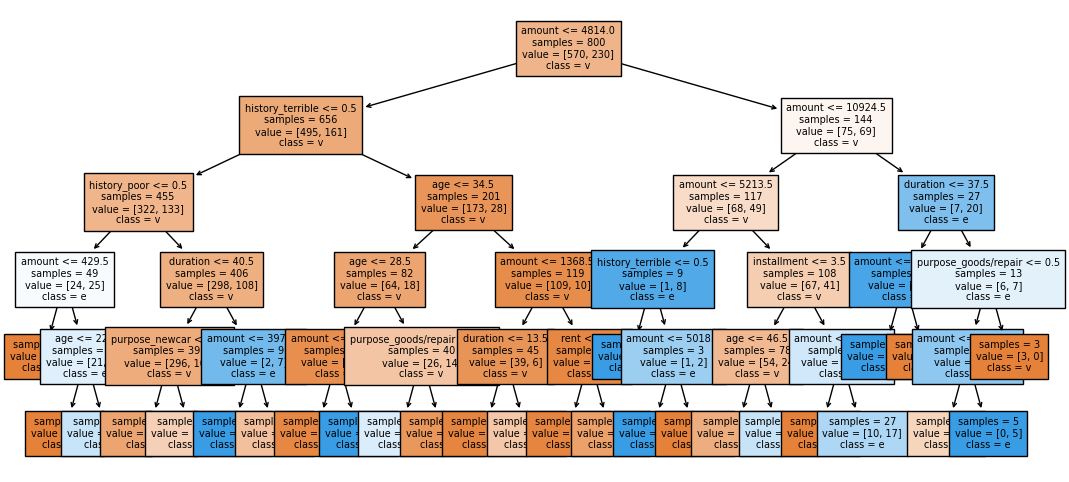

In [15]:
from sklearn.tree import plot_tree

# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {model_tree.get_depth()}")
print(f"Número de nodos terminales: {model_tree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_tree,
            feature_names = X_train.columns,
            class_names   = 'ventas_altas',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )



## Predicción y evaluación del modelo

In [16]:

# Predict the probabilities
y_test['prob_hat_tree'] = model_tree.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head()


,Default,prob_hat,Default_hat_logit,prob_hat_tree
681,0,0.214564,0,0.216828
990,0,0.187190,0,0.031250
155,1,0.265616,0,0.216828
768,0,0.163977,0,0.050000
438,0,0.177238,0,0.031250


In [17]:

# Create the predicted class labels based on the rule
y_test['Default_hat_tree'] = (y_test['prob_hat_tree'] > rule).astype(int)


In [18]:

# Display the first few rows of the specified columns
print(y_test[['Default', 'prob_hat', 'prob_hat_tree', 'Default_hat_logit','Default_hat_tree']].head(30))

     Default  prob_hat  prob_hat_tree  Default_hat_logit  Default_hat_tree
681        0  0.214564       0.216828                  0                 0
990        0  0.187190       0.031250                  0                 0
155        1  0.265616       0.216828                  0                 0
768        0  0.163977       0.050000                  0                 0
438        0  0.177238       0.031250                  0                 0
363        0  0.215117       0.216828                  0                 0
688        0  0.185587       0.216828                  0                 0
555        1  0.162870       0.216828                  0                 0
620        0  0.182760       0.050000                  0                 0
99         0  0.277222       0.257576                  0                 0
756        0  0.053970       0.032258                  0                 0
428        0  0.132411       0.216828                  0                 0
888        0  0.494974   

In [19]:

accuracy = accuracy_score(
            y_true    = y_test['Default'],
            y_pred    = y_test['Default_hat_tree'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")




El accuracy de test es: 66.5%


In [20]:

# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test['Default'],
    y_test['Default_hat_tree'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,114,16
1,51,19


### Purnning

In [86]:
from sklearn.model_selection import GridSearchCV

# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 0.005, 40)}
param_grid

{'ccp_alpha': array([0.        , 0.00012821, 0.00025641, 0.00038462, 0.00051282,
        0.00064103, 0.00076923, 0.00089744, 0.00102564, 0.00115385,
        0.00128205, 0.00141026, 0.00153846, 0.00166667, 0.00179487,
        0.00192308, 0.00205128, 0.00217949, 0.00230769, 0.0024359 ,
        0.0025641 , 0.00269231, 0.00282051, 0.00294872, 0.00307692,
        0.00320513, 0.00333333, 0.00346154, 0.00358974, 0.00371795,
        0.00384615, 0.00397436, 0.00410256, 0.00423077, 0.00435897,
        0.00448718, 0.00461538, 0.00474359, 0.00487179, 0.005     ])}

In [87]:

# Búsqueda por validación cruzada
grid_tree = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

grid_tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'ccp_alpha': array([0.        , 0.00012821, 0.00025641, 0.00038462, 0.00051282,
       0.00064103, 0.00076923, 0.00089744, 0.00102564, 0.00115385,
       0.00128205, 0.00141026, 0.00153846, 0.00166667, 0.00179487,
       0.00192308, 0.00205128, 0.00217949, 0.00230769, 0.0024359 ,
       0.0025641 , 0.00269231, 0.00282051, 0.00294872, 0.00307692,
       0.00320513, 0.00333333, 0.00346154, 0.00358974, 0.00371795,
       0.00384615, 0.00397436, 0.00410256, 0.00423077, 0.00435897,
       0.00448718, 0.00461538, 0.00474359, 0.00487179, 0.005     ])},
             return_train_score=True, scoring='accuracy')

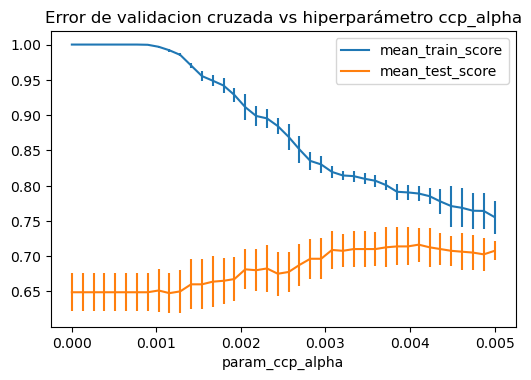

In [88]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid_tree.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");


In [89]:
grid_tree.best_params_

{'ccp_alpha': 0.0041025641025641026}

In [90]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
model_tree_final = grid_tree.best_estimator_
print(f"Profundidad del árbol: {model_tree_final.get_depth()}")
print(f"Número de nodos terminales: {model_tree_final.get_n_leaves()}")

Profundidad del árbol: 7
Número de nodos terminales: 10


In [91]:

# Predict the probabilities
y_test['prob_hat_tree_cp'] = model_tree_final.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head()


,Default,prob_hat,Default_hat_logit,prob_hat_tree,Default_hat_tree,prob_hat_tree_cp,Default_hat_tree_cp
681,0,0.214564,0,0.216828,0,0.216828,0
990,0,0.187190,0,0.031250,0,0.139303,0
155,1,0.265616,0,0.216828,0,0.216828,0
768,0,0.163977,0,0.050000,0,0.139303,0
438,0,0.177238,0,0.031250,0,0.139303,0


In [92]:

# Create the predicted class labels based on the rule
y_test['Default_hat_tree_cp'] = (y_test['prob_hat_tree_cp'] > rule).astype(int)


In [93]:

accuracy = accuracy_score(
            y_true    = y_test['Default'],
            y_pred    = y_test['Default_hat_tree_cp'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")




El accuracy de test es: 65.5%


In [94]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test['Default'],
    y_test['Default_hat_tree_cp'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,111,19
1,50,20


## Random Forests

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
import multiprocessing

In [101]:


# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {
    'n_estimators': [150,200],
    'max_features': [5, 7, 9],
    'max_depth'   : [None, 3, 10, 20],
    'criterion'   : ['gini', 'entropy']
}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_forest = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_forest.fit(X = X_train, y = y_train)



GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=RandomForestClassifier(random_state=123), n_jobs=7,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 10, 20],
                         'max_features': [5, 7, 9], 'n_estimators': [150]},
             return_train_score=True, scoring='accuracy')

In [103]:

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid_forest.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
8,gini,10,9,150,0.718333,0.023102,0.951875,0.008032
3,gini,3,5,150,0.717917,0.031447,0.746458,0.007601
5,gini,3,9,150,0.717083,0.029357,0.752604,0.007254
15,entropy,3,5,150,0.716667,0.033901,0.740625,0.006702


In [105]:


# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_forest.best_params_, ":", grid_forest.best_score_, grid_forest.scoring)



----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} : 0.7183333333333333 accuracy


In [106]:


model_grid_forest_final = grid_forest.best_estimator_

# Predict the probabilities
y_test['prob_hat_forest'] = model_grid_forest_final.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head()


,Default,prob_hat,Default_hat_logit,prob_hat_tree,Default_hat_tree,prob_hat_tree_cp,Default_hat_tree_cp,prob_hat_forest
681,0,0.214564,0,0.216828,0,0.216828,0,0.301790
990,0,0.187190,0,0.031250,0,0.139303,0,0.170469
155,1,0.265616,0,0.216828,0,0.216828,0,0.250153
768,0,0.163977,0,0.050000,0,0.139303,0,0.248004
438,0,0.177238,0,0.031250,0,0.139303,0,0.199037


In [107]:

# Create the predicted class labels based on the rule
y_test['Default_hat_forest'] = (y_test['prob_hat_forest'] > rule).astype(int)


In [108]:

accuracy = accuracy_score(
            y_true    = y_test['Default'],
            y_pred    = y_test['Default_hat_forest'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")




El accuracy de test es: 67.0%


In [109]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test['Default'],
    y_test['Default_hat_forest'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,118,12
1,54,16


## Importancia de predictores
### Importancia por pureza de nodos

In [114]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': model_grid_forest_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,amount,0.339368
3,age,0.221282
0,duration,0.171628
2,installment,0.056187
6,history_terrible,0.040343
9,purpose_newcar,0.038575
5,history_poor,0.035226
4,rent,0.028997
8,purpose_goods/repair,0.021980
10,purpose_usedcar,0.021618


###  Importancia por permutación

In [118]:
from sklearn.inspection import permutation_importance

importancia = permutation_importance(
                estimator    = model_grid_forest_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'accuracy',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)



,importances_mean,importances_std,feature
1,0.18825,0.017847,amount
0,0.13550,0.003410,duration
3,0.11250,0.005244,age
9,0.05550,0.006000,purpose_newcar
6,0.05075,0.003588,history_terrible
4,0.02625,0.001768,rent
2,0.01800,0.001871,installment
5,0.01725,0.006865,history_poor
10,0.01025,0.002424,purpose_usedcar
8,0.01000,0.003708,purpose_goods/repair
